In [16]:
#import dependencies
import os
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress
from datetime import timedelta

In [6]:
#import duration csv file
duration_path = os.path.join("appdata", "duration_vs_number_of_sessions_per_webvisitor.csv")
duration = pd.read_csv(duration_path)
duration

,Day Index,Number of Sessions per User,Avg. Session Duration
0,1/1/2021,1.00,0:00:26
1,1/2/2021,1.00,0:00:24
2,1/3/2021,1.00,0:00:12
3,1/4/2021,1.00,0:00:08
4,1/5/2021,1.00,0:00:03
5,1/6/2021,1.00,0:00:56
6,1/7/2021,1.00,0:00:00
7,1/8/2021,1.00,0:00:01
8,1/9/2021,1.14,0:01:10
9,1/10/2021,1.11,0:00:28


In [18]:
#convert the time column to seconds
def seconder(x):
    hours, mins, secs = map(float, x.split(":"))
    td = timedelta(hours=hours, minutes=mins, seconds=secs)
    return td.total_seconds()

#create new column in the df with total seconds
duration['seconds'] = duration['Avg. Session Duration'].apply(seconder)

In [19]:
#view the new dataframe with a seconds column
duration

,Day Index,Number of Sessions per User,Avg. Session Duration,seconds
0,1/1/2021,1.00,0:00:26,26.0
1,1/2/2021,1.00,0:00:24,24.0
2,1/3/2021,1.00,0:00:12,12.0
3,1/4/2021,1.00,0:00:08,8.0
4,1/5/2021,1.00,0:00:03,3.0
5,1/6/2021,1.00,0:00:56,56.0
6,1/7/2021,1.00,0:00:00,0.0
7,1/8/2021,1.00,0:00:01,1.0
8,1/9/2021,1.14,0:01:10,70.0
9,1/10/2021,1.11,0:00:28,28.0


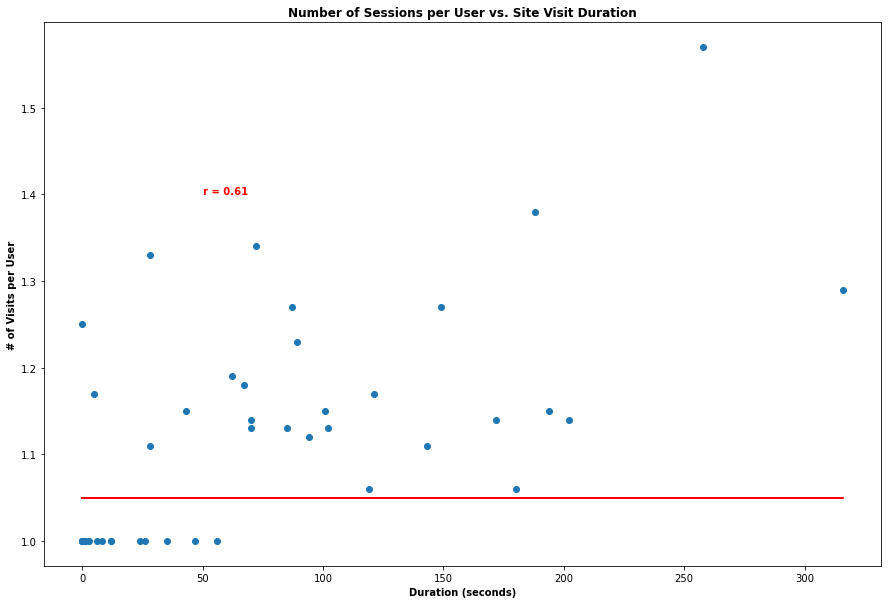

In [35]:
#change fig size
plt.figure(figsize = (15,10))

#graph # of sessions per user vs. average session duration
plt.scatter(duration['seconds'], duration['Number of Sessions per User'])

#perform regression on # of sessions per user vs. average session duration
(slope, intercept, rvalue, pvalue, stderr) = linregress(duration["seconds"], duration["Number of Sessions per User"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (duration['seconds']*slope) + intercept
plt.plot(duration['seconds'], regress_values, "r-")
# line_eq = f"y = {slope}*x + {intercept}"
# plt.annotate(line_eq, (50,1.5), color = "r", fontweight = "bold")
r_eq = f"r = {rvalue}"
plt.annotate(r_eq, (50,1.4), color = "r", fontweight = "bold")
plt.title("Number of Sessions per User vs. Site Visit Duration", fontweight="bold")
plt.xlabel("Duration (seconds)", fontweight="bold")
plt.ylabel("# of Visits per User", fontweight="bold")




plt.show()